In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

In [3]:
df4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df4.csv")
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4

,collision_no,year,month,day,hour,longitude,latitude,road_class,road_surface_cond,visibility,light,impact_type,involved_class,involved_injury_class,# involved,# injured,# KSI,# fatalities
0,1,2000,9,0,8,-79.456317,43.727732,Minor Arterial,DRY,CLEAR,DAYLIGHT,TURNING MOVEMENT,DRIVER,NONE,1,0,0,0
1,1,2000,9,0,8,-79.456317,43.727732,Minor Arterial,DRY,CLEAR,DAYLIGHT,TURNING MOVEMENT,DRIVER,NONE,1,0,0,0
2,2,2000,9,0,8,-79.456271,43.727698,Minor Arterial,DRY,CLEAR,DAYLIGHT,OTHER,PASSENGER,MINIMAL,1,1,0,0
3,2,2000,9,0,8,-79.456271,43.727698,Minor Arterial,DRY,CLEAR,DAYLIGHT,OTHER,PASSENGER,MINIMAL,1,1,0,0
4,2,2000,9,0,8,-79.456271,43.727698,Minor Arterial,DRY,CLEAR,DAYLIGHT,OTHER,VEHICLE OWNER,NONE,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334484,1038396,2019,5,4,22,-79.351940,43.677554,Major Arterial,DRY,CLEAR,"DARK, ARTIFICIAL",TURNING MOVEMENT,DRIVER,NONE,1,0,0,0
2334485,1038396,2019,5,4,22,-79.351940,43.677554,Major Arterial,DRY,CLEAR,"DARK, ARTIFICIAL",TURNING MOVEMENT,PASSENGER,MINOR,1,1,0,0
2334486,1038397,2019,7,5,22,-79.314602,43.678378,Minor Arterial,WET,RAIN,"DARK, ARTIFICIAL",SMV UNATTENDED VEHICLE,DRIVER,NONE,1,0,0,0
2334487,1038398,2019,10,1,9,-79.372333,43.651519,Major Arterial,DRY,CLEAR,DAYLIGHT,PEDESTRIAN COLLISIONS,PEDESTRIAN,MINOR,1,1,0,0


In [4]:
df4.columns

Index(['collision_no', 'year', 'month', 'day', 'hour', 'longitude', 'latitude',
       'road_class', 'road_surface_cond', 'visibility', 'light', 'impact_type',
       'involved_class', 'involved_injury_class', '# involved', '# injured',
       '# KSI', '# fatalities'],
      dtype='object')

In [5]:
# Features for the prediction of '# KSI'
features = list(df4.columns[2:13])       # NOT including: 'collision_no', 'year', 
#                                                         'involved_injury_class',
#                                                         '# involved', '# injured', '# KSI', '# fatalities'
features

['month',
 'day',
 'hour',
 'longitude',
 'latitude',
 'road_class',
 'road_surface_cond',
 'visibility',
 'light',
 'impact_type',
 'involved_class']

In [0]:
df4_n19 = df4[df4['year']!=2019]  # all years except 2019!!!

# Separating out the features 
x_display = df4_n19[features]
# Separating out the target
y_display = df4_n19['# KSI']

In [7]:
# Label Encoding

df4_n19_cat = df4_n19.copy()

df4_n19_cat[['road_class', 'road_surface_cond', 'visibility', 'light', 'impact_type', 'involved_class']] = df4_n19_cat[['road_class', 'road_surface_cond', 'visibility', 'light', 'impact_type', 'involved_class']].astype('category')

df4_n19_cat['road_class'] = df4_n19_cat['road_class'].cat.codes
df4_n19_cat['road_surface_cond'] = df4_n19_cat['road_surface_cond'].cat.codes
df4_n19_cat['visibility'] = df4_n19_cat['visibility'].cat.codes
df4_n19_cat['light'] = df4_n19_cat['light'].cat.codes
df4_n19_cat['impact_type'] = df4_n19_cat['impact_type'].cat.codes
df4_n19_cat['involved_class'] = df4_n19_cat['involved_class'].cat.codes

# Separating out the features 
x = df4_n19_cat[features]
# Separating out the target
y = df4_n19_cat['# KSI']

df4_n19_cat.head()

,collision_no,year,month,day,hour,longitude,latitude,road_class,road_surface_cond,visibility,light,impact_type,involved_class,involved_injury_class,# involved,# injured,# KSI,# fatalities
0,1,2000,9,0,8,-79.456317,43.727732,8,0,0,4,9,4,NONE,1,0,0,0
1,1,2000,9,0,8,-79.456317,43.727732,8,0,0,4,9,4,NONE,1,0,0,0
2,2,2000,9,0,8,-79.456271,43.727698,8,0,0,4,3,13,MINIMAL,1,1,0,0
3,2,2000,9,0,8,-79.456271,43.727698,8,0,0,4,3,13,MINIMAL,1,1,0,0
4,2,2000,9,0,8,-79.456271,43.727698,8,0,0,4,3,20,NONE,1,0,0,0


In [8]:
import plotly.graph_objects as go

y_value = [df4_n19[df4_n19['# KSI']==0].shape[0], df4_n19[df4_n19['# KSI']==1].shape[0]]
fig = go.Figure(data=[go.Bar(
    x = ['NOT KSI', 'KSI'], 
    y = y_value,
    text = [(i/df4_n19.shape[0])*100 for i in y_value],
    textposition = 'outside',
    texttemplate = '%{text:.1f}'+'%')])
fig.update_layout(title ='',
                  xaxis = dict(
                      title = ''), 
                  yaxis = dict(
                      title = 'Number of people involved in collisions'))
fig.show()

---
## **SHAP (SHapley Additive exPlanations)** 
---

In [18]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1819212, 11) (1819212,)
Test set: (454804, 11) (454804,)


In [0]:
x_display_train, x_display_test, y_display_train, y_display_test = train_test_split(x_display, y_display, test_size=0.2, random_state=27)

In [0]:
# from imblearn.over_sampling import SMOTENC

# sm_nc = SMOTENC(random_state=27, categorical_features=[5,6,7,8,9,10])
# x_train, y_train = sm_nc.fit_sample(x_train, y_train)

In [0]:
# Oversampling with ADASYN
from imblearn.over_sampling import ADASYN

ad = ADASYN(random_state=27, ratio=1.0)
x_train, y_train = ad.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
# # Standardizing the features
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)   # Fit on training set only
# x_test = sc.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

model_GB = GradientBoostingClassifier() # n_estimators=1000
model_GB.fit(x_train , y_train)
y_pred = model_GB.predict(x_test)

Accuracy:  0.9485932401649941


[Text(0, 0.5, '- (NOT KSI)'), Text(0, 1.5, '+ (KSI)')]

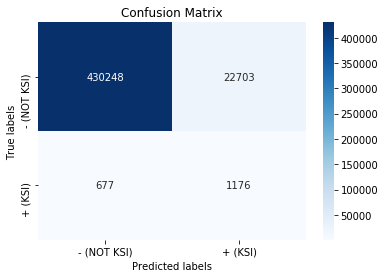

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)  

import seaborn as sns
import matplotlib.pyplot as plt  

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])
ax.yaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['0 (NOT KSI)', '1 (KSI)']))

              precision    recall  f1-score   support

 0 (NOT KSI)       1.00      0.95      0.97    452951
     1 (KSI)       0.05      0.63      0.09      1853

    accuracy                           0.95    454804
   macro avg       0.52      0.79      0.53    454804
weighted avg       0.99      0.95      0.97    454804



### Save and Load Trained Data & Model

In [0]:
# Save model and data
import pickle

with open("SHAP_trained_model.pkl", "wb") as f:
    pickle.dump(model_GB, f)

with open("SHAP_trained_data.pkl", "wb") as f:
    pickle.dump([x_train, y_train, x_test, y_test], f)

In [0]:
# # Load model and data
# import pickle

# with open("/content/drive/My Drive/Colab Notebooks/SHAP_trained_data.pkl", "rb") as f:
#     x_train, y_train, x_test, y_test = pickle.load(f)

# with open("/content/drive/My Drive/Colab Notebooks/SHAP_trained_model.pkl", "rb") as f:
#     model_GB = pickle.load(f)

# y_pred = model_GB.predict(x_test)

In [32]:
!pip install shap

###SHAP on X_test

In [33]:
import shap

# Here we use the TreeSHAP implementation, an efficient estimation approach for tree-based models
explainer = shap.TreeExplainer(model_GB)
shap_values = explainer.shap_values(x_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [0]:
def logodds_to_prob(logodds):
  odds = np.e**logodds
  prob = odds/(1+odds)
  return prob

In [0]:
def prob_to_logodds(prob):
  odds = prob/(1-prob)
  logodds = np.log(odds) # np.log is ln, whereas np.log10 is the standard base 10 log
  return logodds

In [36]:
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace=True)
y_test_df

,index,# KSI
0,2130971,0
1,1062101,0
2,1790476,0
3,1795045,0
4,1815598,0
...,...,...
454799,15762,0
454800,2061896,0
454801,906701,0
454802,1593996,0


In [37]:
y_test_df[y_test_df['# KSI']==1].index

Int64Index([   408,    778,    919,   1094,   1120,   1530,   1652,   2366,
              2413,   2781,
            ...
            452650, 452839, 452927, 453130, 453572, 453616, 453778, 454511,
            454614, 454706],
           dtype='int64', length=1853)

In [38]:
# print the JS visualization code to the notebook
shap.initjs()

# Visualize a single prediction
tsn = 408  # test_sample_number

shap.force_plot(explainer.expected_value, shap_values[tsn,:], x_display_test.iloc[tsn,:])

In [39]:
KSI_prob = model_GB.predict_proba(x_test)[tsn][1]
print('Probability of being a KSI accident: {:,.1f}%'.format(KSI_prob*100))
print('log-odds of this probability: {:.2f}'.format(prob_to_logodds(KSI_prob)))
print('Predicted class: {:}, Actual class: {:} (0:NOT KSI, 1:KSI)'.format(y_pred[tsn], y_test.iloc[tsn]))

Probability of being a KSI accident: 89.4%
log-odds of this probability: 2.13
Predicted class: 1, Actual class: 1 (0:NOT KSI, 1:KSI)


In [40]:
# print the JS visualization code to the notebook
shap.initjs()

# Visualize a single prediction
tsn = 35410  # test_sample_number

shap.force_plot(explainer.expected_value, shap_values[tsn,:], x_display_test.iloc[tsn,:])

In [41]:
KSI_prob = model_GB.predict_proba(x_test)[tsn][1]
print('Probability of being a KSI accident: {:,.1f}%'.format(KSI_prob*100))
print('log-odds of this probability: {:.2f}'.format(prob_to_logodds(KSI_prob)))
print('Predicted class: {:}, Actual class: {:} (0:NOT KSI, 1:KSI)'.format(y_pred[tsn], y_test.iloc[tsn]))

Probability of being a KSI accident: 26.4%
log-odds of this probability: -1.03
Predicted class: 0, Actual class: 0 (0:NOT KSI, 1:KSI)


**The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue**

In [42]:
# base value
logodds_to_prob(0.131)

0.5327032450054405

In [43]:
y_train.mean()

0.5001043037723197

In [44]:
prob_to_logodds(y_train.mean())

0.00041721509533088503

In [45]:
y_train_pred = model_GB.predict(x_train)
y_train_pred.mean()

0.4749546775275039

In [46]:
prob_to_logodds(y_train_pred.mean())

-0.10026520363387156

In [47]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:10, :], x_test.iloc[:10, :])

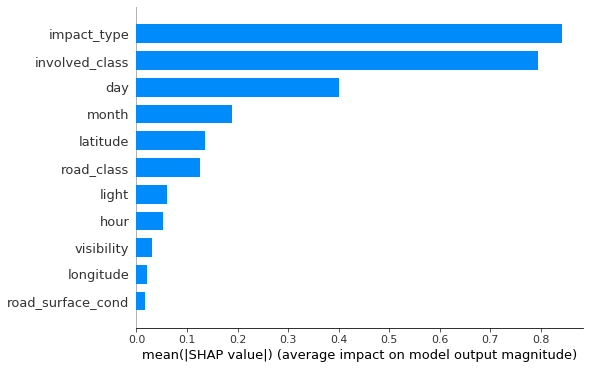

In [48]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [49]:
for i in range(len(x_test.columns)):
  print('Feature {:}: mean(|SHAP value|): {:.2f}, probability: {:.2f} --> {:.2f}'.
        format(x_test.columns[i], abs(shap_values[:, i]).mean(), logodds_to_prob(abs(shap_values[:, i]).mean()), logodds_to_prob(abs(shap_values[:, i]).mean())-0.5))

Feature month: mean(|SHAP value|): 0.19, probability: 0.55 --> 0.05
Feature day: mean(|SHAP value|): 0.40, probability: 0.60 --> 0.10
Feature hour: mean(|SHAP value|): 0.05, probability: 0.51 --> 0.01
Feature longitude: mean(|SHAP value|): 0.02, probability: 0.51 --> 0.01
Feature latitude: mean(|SHAP value|): 0.14, probability: 0.53 --> 0.03
Feature road_class: mean(|SHAP value|): 0.13, probability: 0.53 --> 0.03
Feature road_surface_cond: mean(|SHAP value|): 0.02, probability: 0.50 --> 0.00
Feature visibility: mean(|SHAP value|): 0.03, probability: 0.51 --> 0.01
Feature light: mean(|SHAP value|): 0.06, probability: 0.52 --> 0.02
Feature impact_type: mean(|SHAP value|): 0.84, probability: 0.70 --> 0.20
Feature involved_class: mean(|SHAP value|): 0.79, probability: 0.69 --> 0.19


In [50]:
logodds_to_prob(0.82)-0.5+logodds_to_prob(0.8)-0.5+logodds_to_prob(0.42)-0.5+logodds_to_prob(0.22)-0.5+logodds_to_prob(0.15)-0.5+logodds_to_prob(0.14)-0.5+logodds_to_prob(0.7)-0.5+logodds_to_prob(0.6)-0.5+logodds_to_prob(0.4)-0.5+logodds_to_prob(0.3)-0.5+logodds_to_prob(0.2)-0.5

1.1516543493400984

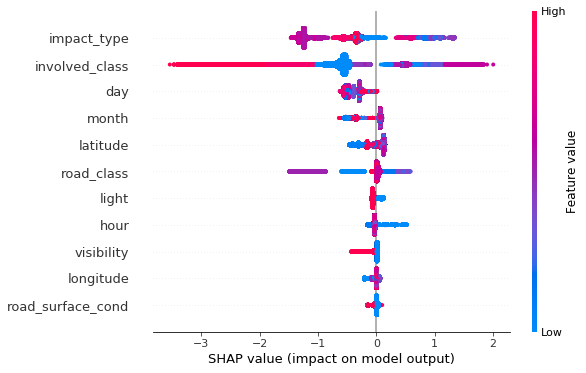

In [51]:
shap.summary_plot(shap_values, x_test)

In [52]:
shap_values_ind = shap.TreeExplainer(model_GB).shap_values(x_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


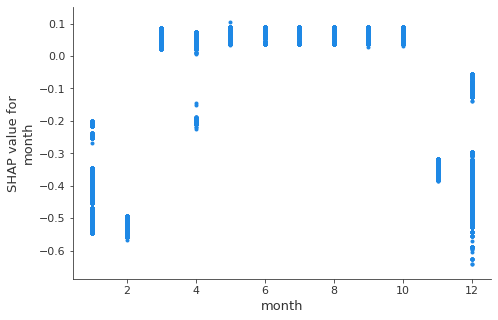

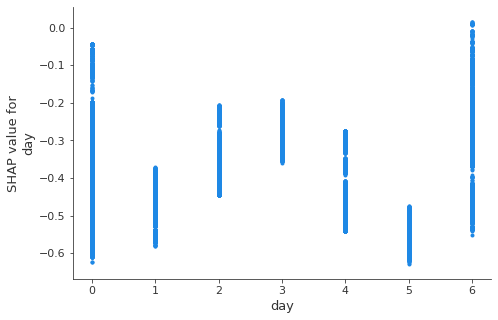

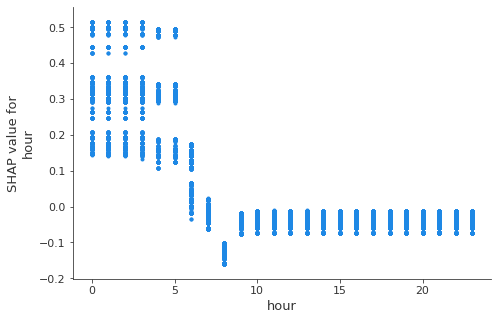

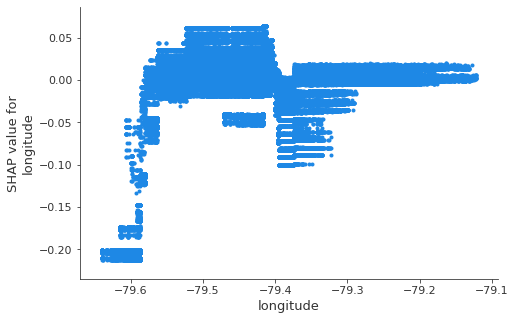

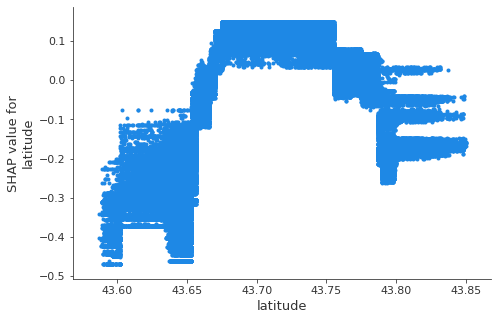

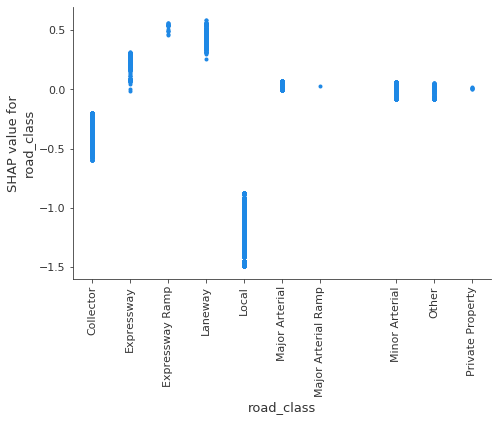

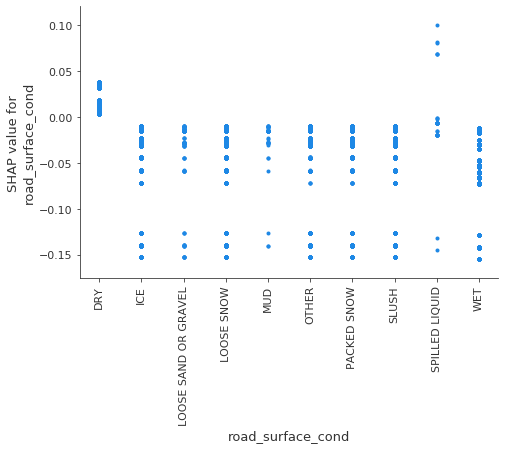

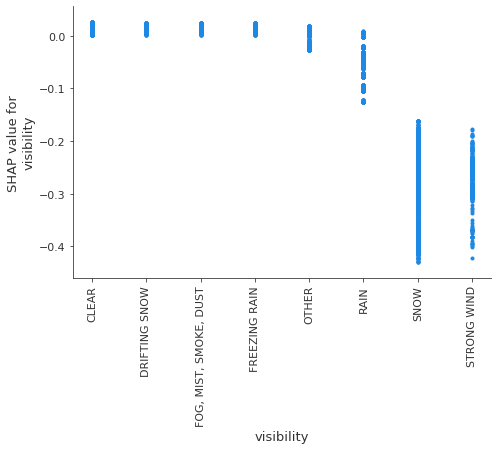

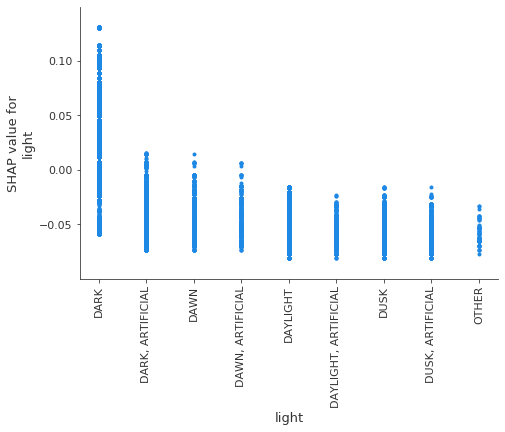

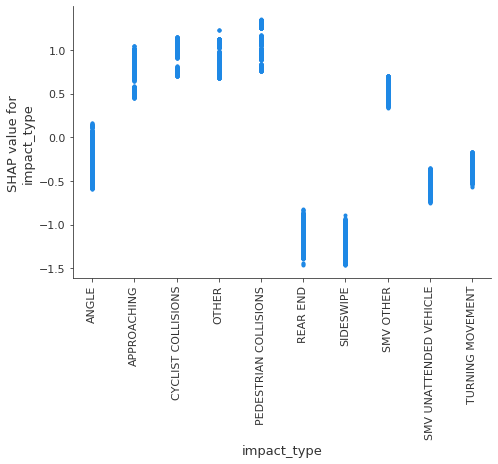

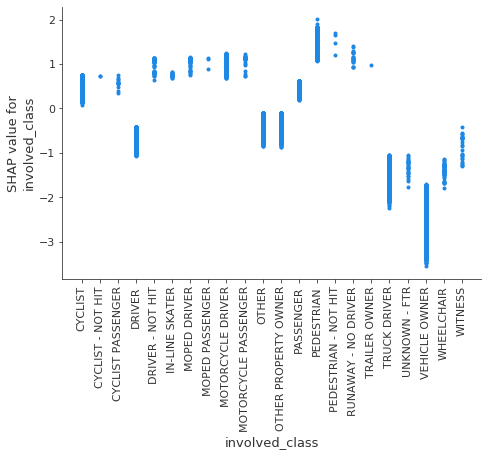

In [53]:
for feature in features:
  shap.dependence_plot(feature, shap_values, x_test, display_features=x_display_test, interaction_index=None)

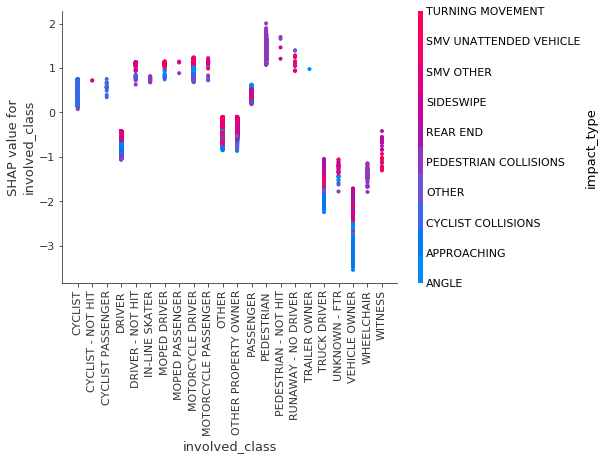

In [54]:
shap.dependence_plot("involved_class", shap_values, x_test, display_features=x_display_test, interaction_index='impact_type' )

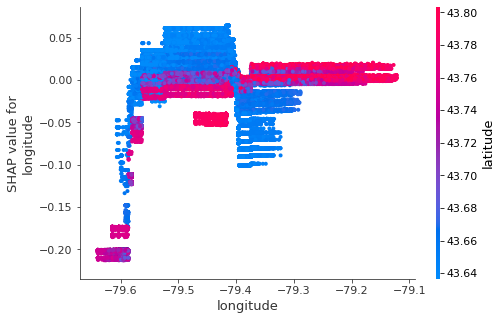

In [55]:
shap.dependence_plot("longitude", shap_values, x_test, display_features=x_display_test, interaction_index='latitude')